## Ratajczyk

In [27]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [28]:
model = CmdStanModel(stan_file='model.stan')

samples = model.sample(
    fixed_param=True,
    iter_sampling=1000,
)

# I have checked p to be sampled from normal and lognormal distributions but results were extremely spread over domain, with numerous samples generated to satify y=50.
# Beta distribution has been chosen as it is conjugate to Binomial distribution (as far as I understand it)

INFO:cmdstanpy:compiling stan file /home/Lab3/model.stan to exe file /home/Lab3/model
INFO:cmdstanpy:compiled model executable: /home/Lab3/model
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [24]:
samples.draws_pd().mean()

lp__              0.000000
accept_stat__     0.000000
N                50.000000
p                 0.199472
y                10.106000
dtype: float64

<AxesSubplot:>

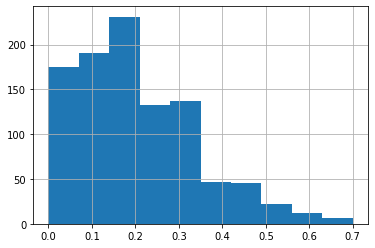

In [29]:
(samples.draws_pd()["y"]/50).hist()
plt.title("Ratio")
plt.show()

# sampled mean is equal to .2

In [33]:
model_posterori = CmdStanModel(stan_file='model_posterori.stan')

samples_posterori = model_posterori.sample(
    data=dict(
        N=50,
        y=7
    )
)

INFO:cmdstanpy:compiling stan file /home/Lab3/model_posterori.stan to exe file /home/Lab3/model_posterori
INFO:cmdstanpy:compiled model executable: /home/Lab3/model_posterori
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [35]:
df = samples_posterori.draws_pd()
df["ratio"] = df["y_pred"]/50

<AxesSubplot:>

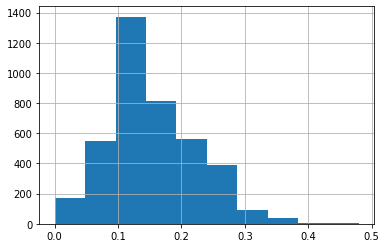

In [36]:
df["ratio"].hist()

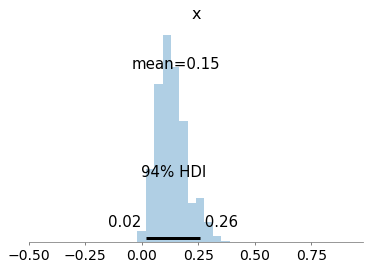

Means: from p: 0.15144465637500001, infered from data: 0.15253000000000003 
HDI: from p: [0.0706078 0.234411 ], infered from data: [0.02 0.26]


In [39]:
az.plot_posterior(
    df["ratio"].to_numpy(), 
    kind='hist', 
    hdi_prob=0.94, 
    point_estimate='mean'
    )
plt.show()

mu = (df['p'].mean(), df["ratio"].mean())
hdi = tuple(az.hdi(df[x].to_numpy(), hdi_prob=0.94) for x in ("p", "ratio"))

print(f"Means: from p: {mu[0]}, infered from data: {mu[1]} ")
print(f"HDI: from p: {hdi[0]}, infered from data: {hdi[1]}")

In [42]:
print(f"P(ratio<.2): {np.mean(df.ratio<.2)}")

P(ratio<.2): 0.7275
